In [86]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [87]:
class GridWorld():
  def __init__(self):
    self.x=0
    self.y=0

  def step(self, a):
    if a==0:
      self.move_right()
    elif a==1:
      self.move_left()
    elif a==2:
      self.move_up()
    elif a==3:
      self.move_down()

    reward = -1
    done = self.is_done()
    return (self.x, self.y), reward, done

  def move_right(self):
    self.y += 1
    if self.y > 3:
      self.y = 3

  def move_left(self):
    self.y -= 1       
    if self.y < 0:
      self.y = 0

  def move_up(self):
    self.x -= 1       
    if self.x < 0:
      self.x = 0    

  def move_down(self):
    self.x += 1       
    if self.x >3:
      self.x = 3   

  def is_done(self):
    if self.x == 3 and self.y==3:
      return True
    else:
      return False

  def get_state(self):
    return (self.x, self.y)

  def reset(self):
    self.x = 0
    self.y = 0
    return (self.x, self.y)           


In [88]:
class AgentMC():
  def __init__(self):
    self.q_table = np.zeros((4,4,4)) # x size, y size, number of action
    self.eps = 0.9
    self.alpha = 0.01 
  
  def select_action(self, s):
    # epsilon-soft greedy policy
    x, y = s
    prob =  random.random()
    if prob < self.eps: # perform random action with epsilon probabilty
      action = random.randint(0,3)
    else: # greedy
      action_val = self.q_table[x,y,:]
      action = np.argmax(action_val)
    return action    

  def update_table(self, history):
    # history is all visited states during one episode
    cum_reward = 0
    for transition in history[::-1]:
      s,a,r,s_next = transition
      x,y = s
      # Monte-Carlo Predition to estimate Q(s,a) (nothing but an alternative expression of V(s))
      self.q_table[x,y,a] = (1-self.alpha)*self.q_table[x,y,a] + self.alpha * cum_reward # Now, I think you are familiar with Robbins-Monro form
      # self.q_table[x,y,a] = self.q_table[x,y,a] + self.alpha * (cum_reward - self.q_table[x,y,a])  
      cum_reward = cum_reward + r

  def anneal_eps(self):
    # annealing part: You may safely ignore this part :) (by Han)
    self.eps -= 0.03
    self.eps = max(self.eps, 0.1)

  def show_table(self):
    # Show me the one action of which results in the best Q(s,a) value
    q_list = self.q_table.tolist()
    best_qvalue = np.zeros((4,4))
    best_action = np.zeros((4,4))
    for row_idx in range(len(q_list)):
      row = q_list[row_idx]
      for col_idx in range(len(row)):
        col = row[col_idx]
        qvalue = np.max(col)
        action = np.argmax(col)
        best_qvalue[row_idx, col_idx] = qvalue
        best_action[row_idx, col_idx] = action
    return best_qvalue, best_action  

In [89]:
def main():
  env = GridWorld()
  agent = AgentMC()

  for n_epi in range(1000):
    done = False
    history = []

    s = env.reset()
    while not done:
      a = agent.select_action(s)
      s_next, r, done = env.step(a)
      history.append((s,a,r,s_next))
      s = s_next
    agent.update_table(history)
    agent.anneal_eps()

  # Show me the result when it has done!  
  opt_q, opt_policy = agent.show_table()
 
   # Display the opt_q
  fig, ax = plt.subplots()
  plt.imshow(opt_policy, cmap='cool', interpolation='nearest')
  for i in range(4):
    for j in range(4):
        tempstr = "{:.4f}".format(opt_q[i][j])
        text = ax.text(j, i, tempstr, ha="center", va="center", color="k")
  plt.show()  

  # Display the opt_policy
  # 0:R, 1:L, 2:U, 3:D   
  # 0:→, 1:←, 2:↑, 3:↓
  fig, ax = plt.subplots()
  plt.imshow(opt_policy, cmap='cool', interpolation='nearest')
  for i in range(4):
    for j in range(4):
        if opt_policy[i][j] == 0:
            tempstr = "→"
        elif opt_policy[i][j] == 1:
            tempstr = "←"
        elif opt_policy[i][j] == 2:
            tempstr = "↑"
        else:
            tempstr = "↓"
        text = ax.text(j, i, tempstr, ha="center", va="center", color="k")
  plt.show()  
  

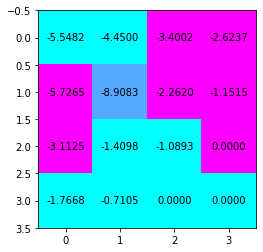

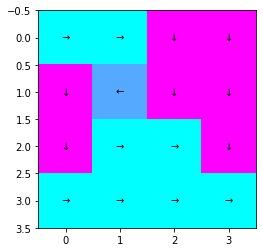

In [90]:
main()